In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
data = pd.read_csv("data_date.csv")

In [58]:
data.head(-5) 

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63
...,...,...,...,...
13637,2024-06-27,Uganda,Unhealthy for Sensitive Groups,134
13638,2024-06-27,Ukraine,Good,36
13639,2024-06-27,United Arab Emirates,Unhealthy for Sensitive Groups,116
13640,2024-06-27,United Kingdom of Great Britain and Northern I...,Unhealthy for Sensitive Groups,147


In [59]:
data.shape #Satır ve Sütun Kontrolü

(13647, 4)

In [56]:
data.dtypes #Veri Tipleri

Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;    object
dtype: object

In [45]:
data.info() #Veri Hakkında Bilgi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647 entries, 0 to 13646
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       13647 non-null  datetime64[ns]
 1   Country    13647 non-null  object        
 2   Status     13647 non-null  object        
 3   AQI Value  13647 non-null  int64         
 4   Year       13647 non-null  int32         
 5   Month      13647 non-null  int32         
 6   Day        13647 non-null  int32         
dtypes: datetime64[ns](1), int32(3), int64(1), object(2)
memory usage: 586.5+ KB


In [17]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce') 

In [11]:
data.corr #Korelasyon Hesabı

<bound method DataFrame.corr of              Date     Country                          Status  AQI Value
0      2022-07-21     Albania                            Good         14
1      2022-07-21     Algeria                        Moderate         65
2      2022-07-21     Andorra                        Moderate         55
3      2022-07-21      Angola  Unhealthy for Sensitive Groups        113
4      2022-07-21   Argentina                        Moderate         63
...           ...         ...                             ...        ...
13642  2024-06-27  Uzbekistan                            Good         26
13643  2024-06-27     Vatican                            Good         21
13644  2024-06-27   Venezuela                            Good         14
13645  2024-06-27     Vietnam                        Moderate         67
13646  2024-06-27      Zambia                        Moderate         59

[13647 rows x 4 columns]>

In [50]:
average_aqi_by_date = data.groupby('Date')['AQI Value'].mean().reset_index()

# AQI değeri ortalaması en yüksek olan ilk 5 tarihin bulunması
top_5_dates = average_aqi_by_date.nlargest(5, 'AQI Value')['Date']

# Sonuçlar
print("AQI değeri ortalaması en yüksek olan ilk 5 tarih:")
print(top_5_dates)

AQI değeri ortalaması en yüksek olan ilk 5 tarih:
68   2023-04-20
67   2023-04-13
64   2023-01-12
66   2023-04-06
65   2023-03-30
Name: Date, dtype: datetime64[ns]


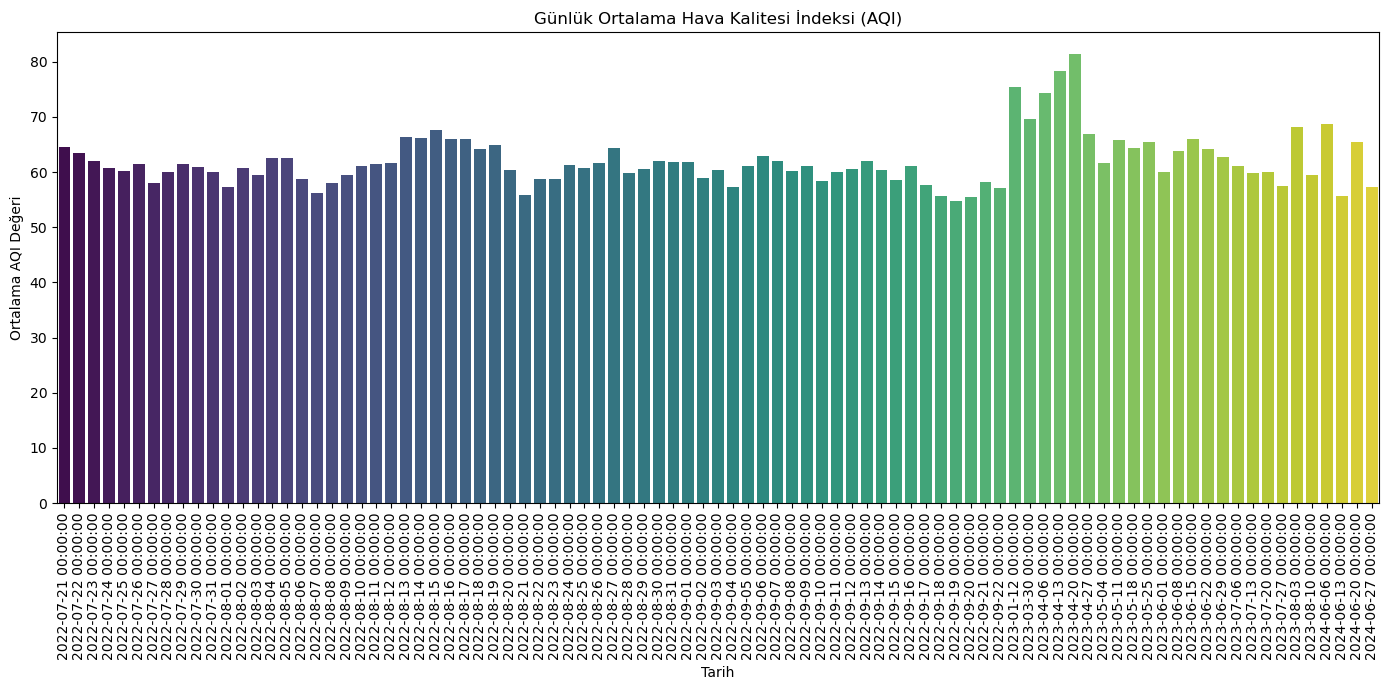

In [38]:

data['Date'] = pd.to_datetime(data['Date'])

# Günlük ortalama AQI değerlerini hesabı
daily_avg_aqi = data.groupby('Date')['AQI Value'].mean().reset_index()

# Çubuk grafik oluşturma
plt.figure(figsize=(14, 7))
sns.barplot(data=daily_avg_aqi, x='Date', y='AQI Value', palette='viridis')

plt.title('Günlük Ortalama Hava Kalitesi İndeksi (AQI)')
plt.xlabel('Tarih')
plt.ylabel('Ortalama AQI Değeri')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [47]:
#Ülkelerin Ortalama AQI Değerleri
average_aqi_by_country = data.groupby('Country')['AQI Value'].mean().reset_index()

print("Ülkelerin ortalama AQI değerleri:")
print(average_aqi_by_country)

Ülkelerin ortalama AQI değerleri:
        Country   AQI Value
0       Albania   25.826531
1       Algeria   60.855670
2       Andorra   31.632653
3        Angola  109.462366
4     Argentina   37.112245
..          ...         ...
137  Uzbekistan   64.147368
138     Vatican   44.061224
139   Venezuela   14.326316
140     Vietnam   91.153061
141      Zambia  114.845361

[142 rows x 2 columns]


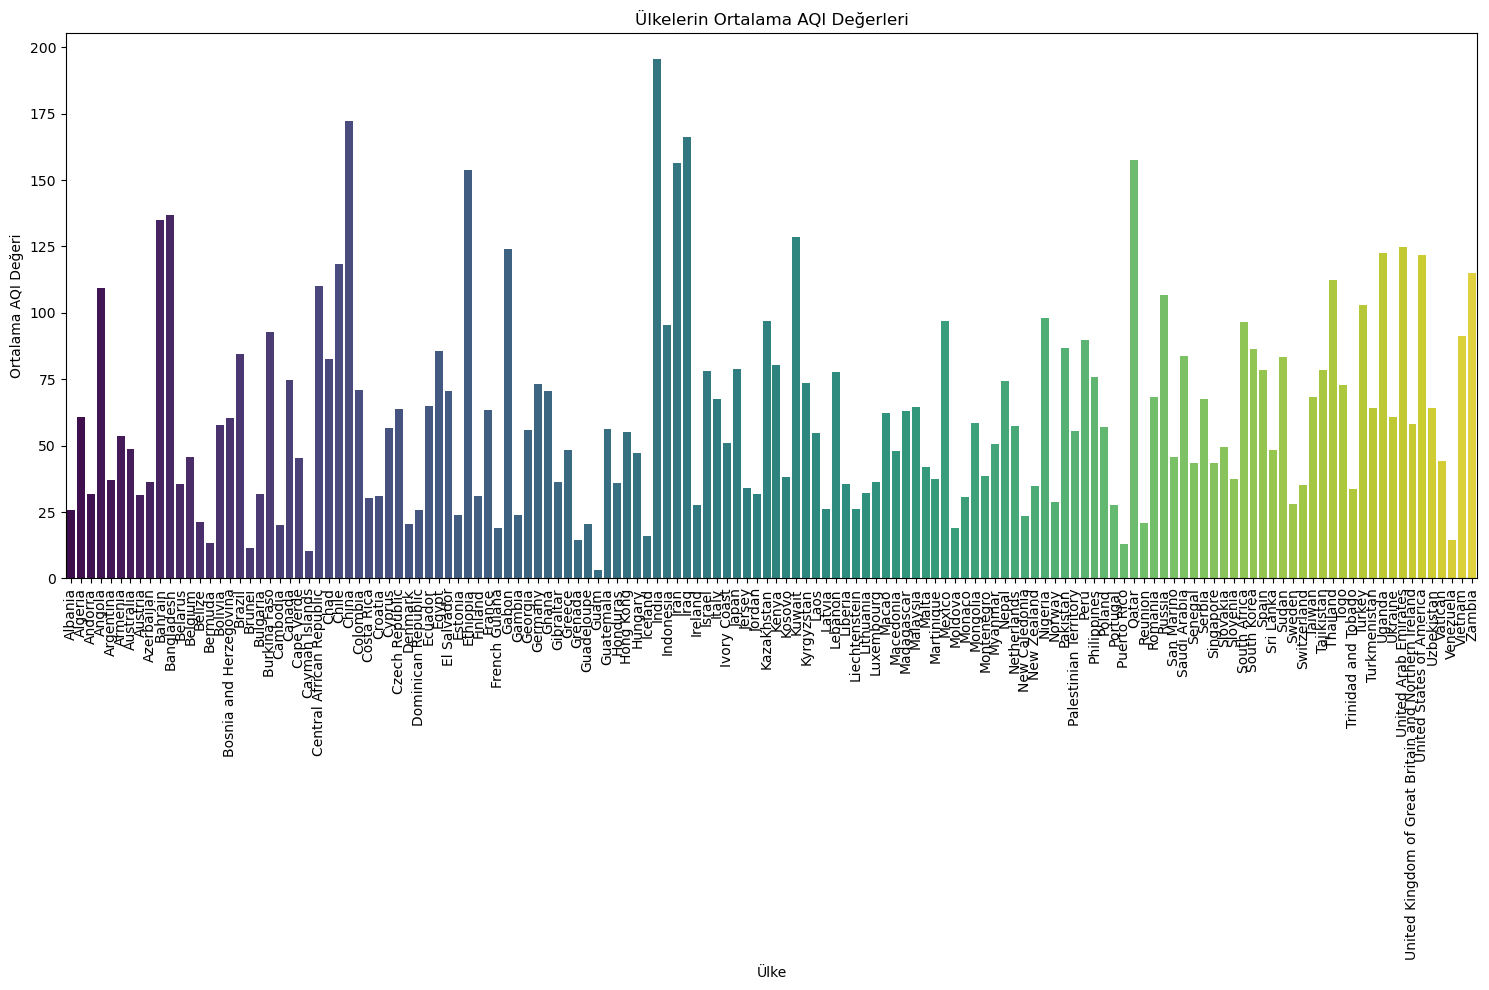

In [48]:
average_aqi_by_country = data.groupby('Country')['AQI Value'].mean().reset_index()

# Çubuk Grafiği
plt.figure(figsize=(15, 10))
sns.barplot(data=average_aqi_by_country, x='Country', y='AQI Value', palette='viridis')

plt.title('Ülkelerin Ortalama AQI Değerleri')
plt.xlabel('Ülke')
plt.ylabel('Ortalama AQI Değeri')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show() #Buradan Hindistanın hava kalitesinin çok kötü olduğunu görüyoruz

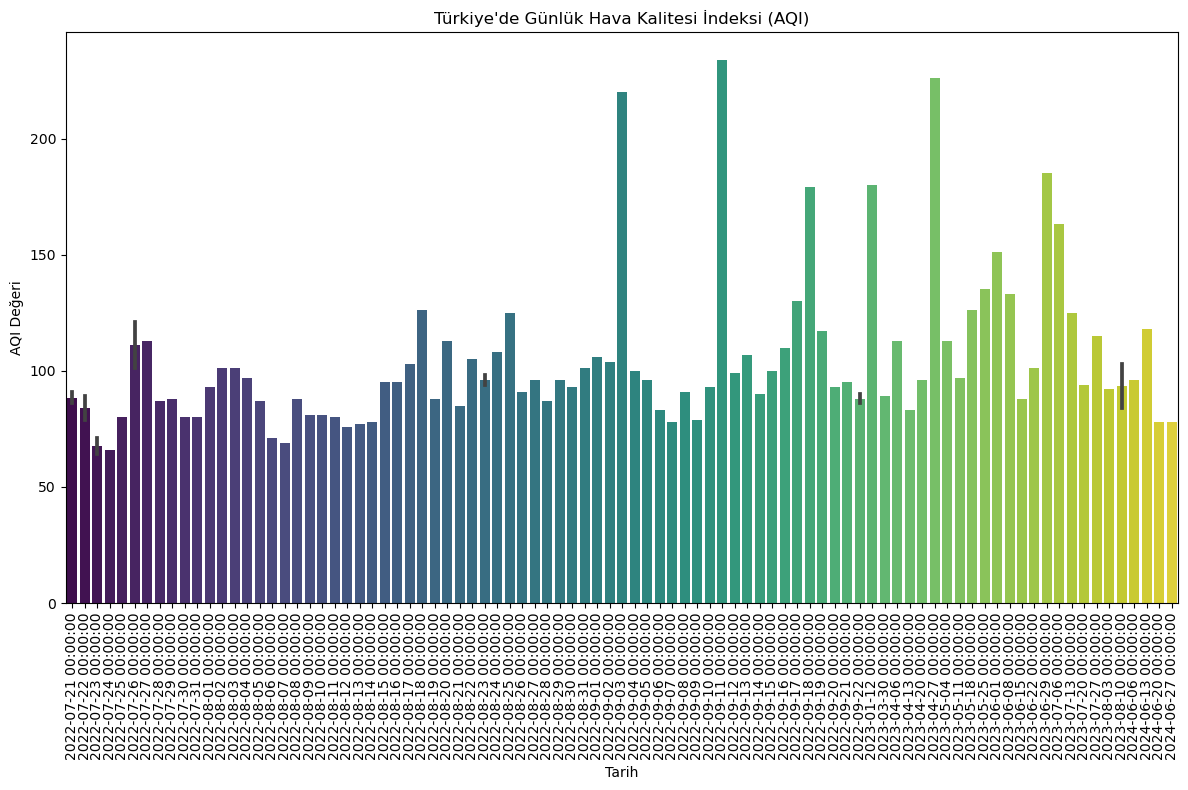

In [37]:
#Türkiye'de Günlük Hava Kalitesi
plt.figure(figsize=(12, 8))
sns.barplot(data=turkiye_data, x='Date', y='AQI Value', palette='viridis')

plt.title('Türkiye\'de Günlük Hava Kalitesi İndeksi (AQI)')
plt.xlabel('Tarih')
plt.ylabel('AQI Değeri')
plt.xticks(rotation=90)
plt.yticks(fontsize=10)  
plt.tight_layout()
plt.show()

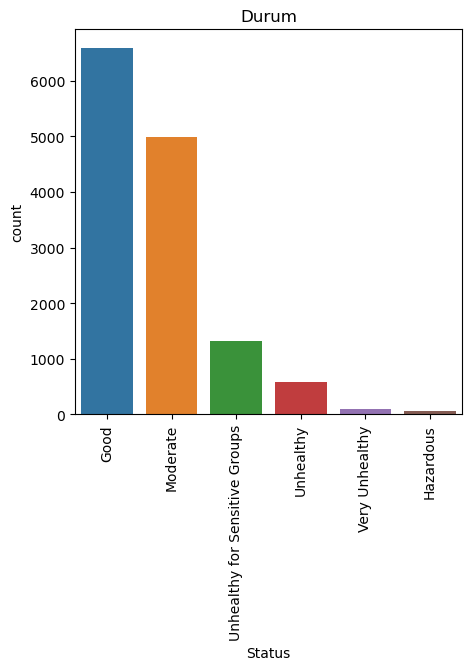

In [62]:
#Durumların istatistiksel dağılımı
sns.countplot(x="Status", data=data)
fig = plt.gcf()
fig.set_size_inches(5, 5)
plt.title("Durum")
plt.xticks(rotation=90)
plt.show()